In [6]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, date

In [66]:
#read data
listings_2017 = pd.read_csv('InsideAirBnb/listings_2017.csv')
listings_2018 = pd.read_csv('InsideAirBnb/listings_2018.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (87) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [67]:
#define outcome as listings in 2017 that don't appear in 2018
set_18 = set(listings_2018.id)
listings_2017['drop_out'] = listings_2017['id'].apply(lambda x: 0 if x in set_18 else 1)
print(listings_2017.drop_out.value_counts(dropna = False))
listings_2017.set_index('id', inplace = True)

0    18425
1    11737
Name: drop_out, dtype: int64


In [68]:
listings_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 6627359 to 12066922
Data columns (total 95 columns):
listing_url                         30162 non-null object
scrape_id                           30162 non-null int64
last_scraped                        30162 non-null object
name                                30162 non-null object
summary                             29447 non-null object
space                               21223 non-null object
description                         30156 non-null object
experiences_offered                 30162 non-null object
neighborhood_overview               18075 non-null object
notes                               13621 non-null object
transit                             17652 non-null object
access                              18664 non-null object
interaction                         17863 non-null object
house_rules                         21408 non-null object
thumbnail_url                       25692 non-null object
medium_url   

In [69]:
listings_2017.describe()

,scrape_id,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,drop_out
count,3.016200e+04,3.016200e+04,0.0,30152.000000,30152.000000,0.0,30162.000000,30162.000000,30162.000000,30063.000000,...,23059.000000,23019.000000,23020.000000,22986.000000,23018.000000,22982.000000,22974.000000,30162.000000,23357.000000,30162.000000
mean,2.017040e+13,3.487289e+07,NaN,5.109213,5.109213,NaN,34.056197,-118.336155,3.411445,1.376060,...,94.186044,9.611799,9.410990,9.765857,9.769311,9.609346,9.479890,3.460845,1.827499,0.389132
std,1.026970e+01,3.312089e+07,NaN,24.777857,24.777857,NaN,0.102051,0.152590,2.471226,0.823774,...,7.964227,0.784745,0.959283,0.657675,0.641670,0.730362,0.833353,5.400201,1.894675,0.487561
min,2.017040e+13,5.900000e+01,NaN,0.000000,0.000000,NaN,33.338905,-118.911026,1.000000,0.000000,...,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.020000,0.000000
25%,2.017040e+13,7.216112e+06,NaN,1.000000,1.000000,NaN,34.013987,-118.433115,2.000000,1.000000,...,92.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.410000,0.000000
50%,2.017040e+13,2.407992e+07,NaN,2.000000,2.000000,NaN,34.066379,-118.350220,2.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.120000,0.000000
75%,2.017040e+13,5.333126e+07,NaN,4.000000,4.000000,NaN,34.103849,-118.269669,4.000000,1.500000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,3.000000,2.690000,1.000000
max,2.017040e+13,1.238270e+08,NaN,856.000000,856.000000,NaN,34.742088,-117.655471,16.000000,8.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,48.000000,18.880000,1.000000


In [70]:
listings_2017.head()

,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,...,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,drop_out
id,,,,,,,,,,,,,,,,,,,,,
6627359,https://www.airbnb.com/rooms/6627359,20170402075022,2017-04-02,Beautiful Beverly Hills Estate,Private estate with private driveway and walkw...,NaN,Private estate with private driveway and walkw...,none,NaN,Private events or video shoots can be booked b...,...,f,NaN,"City of Los Angeles, CA",f,flexible,f,f,6,NaN,0
13960394,https://www.airbnb.com/rooms/13960394,20170402075022,2017-04-02,Beverly Hills Chateau,"The home is a gorgeous 5 bedroom, 5 bathroom, ...",NaN,"The home is a gorgeous 5 bedroom, 5 bathroom, ...",none,NaN,NaN,...,f,NaN,"City of Los Angeles, CA",f,strict,f,f,4,NaN,0
17992978,https://www.airbnb.com/rooms/17992978,20170402075022,2017-04-02,Grande Bellezza - 119182,Experience inviting Italian elegance in Beverl...,The villa’s refinement is set off by the views...,Experience inviting Italian elegance in Beverl...,none,Points of Interest 5.7 miles to Rodeo Drive 6 ...,All credit card holders must be aged 25 years ...,...,f,NaN,NaN,f,super_strict_60,f,f,12,NaN,1
11344969,https://www.airbnb.com/rooms/11344969,20170402075022,2017-04-02,Beverly Hills Private Guest House,Newly renovated guest house with huge flatscre...,NaN,Newly renovated guest house with huge flatscre...,none,NaN,NaN,...,f,NaN,"City of Los Angeles, CA",f,flexible,f,f,1,NaN,0
8985400,https://www.airbnb.com/rooms/8985400,20170402075022,2017-04-02,Private room in lovely condo,LOCATION!! Your own private room with bathroom...,NaN,LOCATION!! Your own private room with bathroom...,none,"safe, peaceful tree lined street",NaN,...,f,NaN,"City of Los Angeles, CA",f,strict,f,f,3,0.9,1


In [71]:
#Data cleaning
#Drop columns with all missing or irrelevant data
listings_2017 = listings_2017.drop(['host_acceptance_rate', 
                                    'neighbourhood_group_cleansed',
                                    'thumbnail_url',
                                    'medium_url',
                                    'picture_url',
                                    'xl_picture_url',
                                    'host_thumbnail_url',
                                    'host_picture_url'], axis=1)
#All dates to datetime
time_format = '%Y-%m-%d'
listings_2017['last_scraped'] = pd.to_datetime(listings_2017['last_scraped'], format=time_format)
listings_2017['host_since'] = pd.to_datetime(listings_2017['host_since'], format=time_format)
listings_2017['calendar_last_scraped'] = pd.to_datetime(listings_2017['calendar_last_scraped'], format=time_format)
listings_2017['first_review'] = pd.to_datetime(listings_2017['first_review'], format=time_format)
listings_2017['last_review'] = pd.to_datetime(listings_2017['last_review'], format=time_format)

#All dollars to float
listings_2017['price'] = listings_2017['price'].str.replace('$', '').str.replace(',', '').astype(float)
listings_2017['weekly_price'] = listings_2017['weekly_price'].str.replace('$', '').str.replace(',', '').astype(float)
listings_2017['monthly_price'] = listings_2017['monthly_price'].str.replace('$', '').str.replace(',', '').astype(float)
listings_2017['security_deposit'] = listings_2017['security_deposit'].str.replace('$', '').str.replace(',', '').astype(float)
listings_2017['cleaning_fee'] = listings_2017['cleaning_fee'].str.replace('$', '').str.replace(',', '').astype(float)

#Specify categories
listings_2017['room_type'] = listings_2017.room_type.astype('category')
listings_2017['property_type'] = listings_2017.property_type.astype('category')
listings_2017['host_neighbourhood'] = listings_2017.host_neighbourhood.astype('category')
listings_2017['neighbourhood'] = listings_2017.neighbourhood.astype('category')
listings_2017['neighbourhood_cleansed'] = listings_2017.neighbourhood_cleansed.astype('category')
listings_2017['city'] = listings_2017.city.astype('category')
listings_2017['state'] = listings_2017.state.astype('category')
listings_2017['zipcode'] = listings_2017.zipcode.astype('category')
listings_2017['market'] = listings_2017.market.astype('category')
listings_2017['smart_location'] = listings_2017.smart_location.astype('category')
listings_2017['bed_type'] = listings_2017.bed_type.astype('category')
listings_2017['cancellation_policy'] = listings_2017.cancellation_policy.astype('category')

#Change to binary
listings_2017['host_is_superhost'] = listings_2017['host_is_superhost'].apply(lambda x: 1 if x == 't' else 0)
listings_2017['host_has_profile_pic'] = listings_2017['host_has_profile_pic'].apply(lambda x: 1 if x == 't' else 0)
listings_2017['host_identity_verified'] = listings_2017['host_identity_verified'].apply(lambda x: 1 if x == 't' else 0)
listings_2017['is_location_exact'] = listings_2017['is_location_exact'].apply(lambda x: 1 if x == 't' else 0)
listings_2017['requires_license'] = listings_2017['requires_license'].apply(lambda x: 1 if x == 't' else 0)
listings_2017['instant_bookable'] = listings_2017['instant_bookable'].apply(lambda x: 1 if x == 't' else 0)
listings_2017['require_guest_profile_picture'] = listings_2017['require_guest_profile_picture'].apply(lambda x: 1 if x == 't' else 0)
listings_2017['require_guest_phone_verification'] = listings_2017['require_guest_phone_verification'].apply(lambda x: 1 if x == 't' else 0)

#Additional Cleaning/feature generation
#smart_location -> clean to align typos
#license -> get indicator if they have license
#propert_type -> create other category for uncommon values
#host_since -> create days since hosting began
#calendar_last_updated -> get approx days since last update
#get number of listings as 5, 10, 15 miles
#get number of hotels 5, 10, 15 miles away


In [72]:
#Feature generation
#monthly_occupancy = los * (review_per_month / review_rate) (where los = 3 nights, review_rate = 0.50)
listings_2017['monthly_occupancy'] = 3 * (listings_2017['reviews_per_month']/0.50) 
listings_2017['est_monthly_income'] = listings_2017['monthly_occupancy']* listings_2017['price']
#length of hosting
listings_2017['host_hist_dur'] = pd.to_datetime('2017-04-17', format = time_format) - listings_2017['host_since']
#coordinates
listings_2017['coordinates'] = listings_2017[['latitude', 'longitude']].apply(tuple, axis=1)

To get number of listings within a X mile radius, we will use KDtrees

KDtrees are a way to segment large group of points into spatial partitions.  Essentially it creates a tree, where each node is point along which to create a partition.  By organizing points into partions, a set of points can be found more quickly by identifying the right paritition.  For example, to find the nearest neighbor to a given point, one only needs to search the paritions which are close to a given point.  KDtrees are included in the scipy package, but pysal extends the KDtrees to use longitude/latitude.

To find number of listings within an X mile radius:
  1. Create a KD tree from your points, use radius of the earth in miles
  2. Use the query_ball_point method on the KDtree passing in a point or a list of points, and search radius from points in units given in step 1
  3. A list of indices will be returned indicating the points in KD tree that are within radius

In [14]:
'''
import pysal
from pysal.cg.kdtree import KDTree    

locations = list(listings_2017['coordinates'])
tree = KDTree(locations, distance_metric='Arc', radius=pysal.cg.RADIUS_EARTH_MILES)

#takes awhile to run (20-30mins)
locations_1m = tree.query_ball_point(locations, 1)
locations_5m = tree.query_ball_point(locations, 5)
locations_10m = tree.query_ball_point(locations, 10)
'''

In [35]:
'''
#replace indices in results with id numbers:
id_dict = {}
for x,y in enumerate(listings_2017.index):
    id_dict[x] = y
    
def insert_id(lst):
    lst_new =[]
    for x in lst:
        x = [id_dict[y] for y in x]
        lst_new.append(x)
    return lst_new

locations_1m_new = insert_id(locations_1m)
locations_5m_new = insert_id(locations_5m)
locations_10m_new = insert_id(locations_10m)
'''

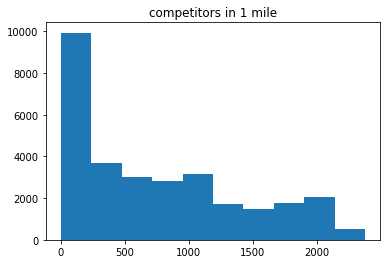

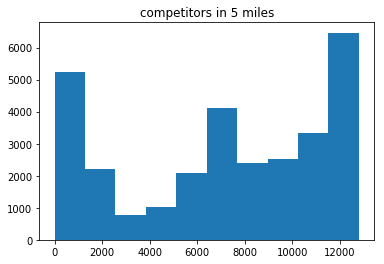

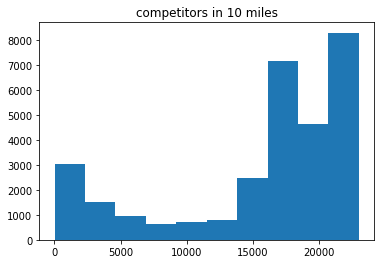

In [37]:
'''
mile_1 = [len(x) for x in locations_1m_new]
mile_5 = [len(x) for x in locations_5m_new]
mile_10 = [len(x) for x in locations_10m_new]

plt.hist(mile_1)
plt.title('competitors in 1 mile')
plt.show()
plt.hist(mile_5)
plt.title('competitors in 5 miles')
plt.show()
plt.hist(mile_10)
plt.title('competitors in 10 miles')
plt.show()
'''

In [64]:

listings_2017['n_comp_1m'] = mile_1
listings_2017['n_comp_5m'] = mile_5
listings_2017['n_comp_10m'] = mile_10
listings_2017['l_comp_1m'] = locations_1m_new
listings_2017['l_comp_5m'] = locations_5m_new
listings_2017['l_comp_10m'] = locations_10m_new
comp = listings_2017[['n_comp_1m', 'n_comp_5m', 'n_comp_10m', 'l_comp_1m', 'l_comp_5m', 'l_comp_10m']]
comp_n = listings_2017[['n_comp_1m', 'n_comp_5m', 'n_comp_10m']]

In [49]:
'''comp'''

,n_comp_1m,n_comp_5m,n_comp_10m,l_comp_1m,l_comp_5m,l_comp_10m
id,,,,,,
6627359,104,10081,19166,"[17793359, 12429431, 12453890, 4029464, 174931...","[3834285, 30474, 12410679, 17514141, 15409453,...","[3834285, 17910060, 16381098, 17861038, 149186..."
13960394,90,10376,19956,"[13047551, 11368434, 13130794, 17944196, 11971...","[30474, 12410679, 17514141, 15409453, 13637979...","[3834285, 15355910, 12010717, 14969055, 141616..."
17992978,164,8083,18905,"[9243055, 14124574, 14290875, 13166141, 710861...","[30474, 12410679, 17514141, 15409453, 13637979...","[3834285, 17910060, 7011378, 14993793, 1584205..."
11344969,124,9000,19088,"[9243055, 14124574, 14290875, 14093707, 168968...","[30474, 12410679, 17514141, 15409453, 13637979...","[3834285, 17910060, 16381098, 7011378, 1499379..."
8985400,326,9061,21477,"[2701715, 8781169, 13496008, 7347419, 571586, ...","[13731595, 16549823, 4190417, 9415050, 1247441...","[7896215, 5688839, 17845278, 16666555, 1299413..."
6688906,493,9199,22166,"[2701715, 9474780, 3294283, 12117528, 15128805...","[13731595, 13217036, 4076998, 7998947, 8443959...","[7896215, 16134698, 13292266, 3249753, 2495346..."
1751569,471,9217,22101,"[2701715, 9474780, 3294283, 12117528, 15128805...","[13731595, 4076998, 7998947, 2187727, 14994256...","[7896215, 16134698, 3249753, 2495346, 14011742..."
4076913,313,8115,20690,"[2701715, 13955829, 4652615, 4512418, 8957332,...","[13731595, 11300567, 913270, 3447745, 5756079,...","[7896215, 17845278, 8440867, 4848364, 15772226..."
16573537,254,6528,19914,"[4033585, 7203585, 14344427, 5883831, 17193005...","[13731595, 11423610, 14933378, 2479155, 127119...","[7896215, 1841611, 2687962, 1049305, 2211325, ..."


In [65]:
'''
import pickle

#file too big to pickle 
#with open('comp.pickle', 'wb') as handle:
#    pickle.dump(comp, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('comp_n.pickle', 'wb') as handle:
    pickle.dump(comp_n, handle, protocol=pickle.HIGHEST_PROTOCOL)
'''
    


In [76]:
#bring in number of competitors

with open('comp_n.pickle', 'rb') as handle:
    competitors_n = pickle.load(handle)

listings_2017 = listings_2017.merge(competitors_n, how='inner', left_index = True, right_index = True)

In [77]:
listings_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 6627359 to 12066922
Data columns (total 94 columns):
listing_url                         30162 non-null object
scrape_id                           30162 non-null int64
last_scraped                        30162 non-null datetime64[ns]
name                                30162 non-null object
summary                             29447 non-null object
space                               21223 non-null object
description                         30156 non-null object
experiences_offered                 30162 non-null object
neighborhood_overview               18075 non-null object
notes                               13621 non-null object
transit                             17652 non-null object
access                              18664 non-null object
interaction                         17863 non-null object
house_rules                         21408 non-null object
host_id                             30162 non-null int64
host_u

In [78]:
listings_2017.describe()

,scrape_id,host_id,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,is_location_exact,...,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,drop_out,monthly_occupancy,est_monthly_income,host_hist_dur,n_comp_1m,n_comp_5m,n_comp_10m
count,3.016200e+04,3.016200e+04,30162.000000,30152.000000,30152.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,...,30162.000000,30162.000000,23357.000000,30162.000000,23357.000000,23357.000000,30152,30162.000000,30162.00000,30162.000000
mean,2.017040e+13,3.487289e+07,0.186427,5.109213,5.109213,0.996585,0.693488,34.056197,-118.336155,0.796665,...,0.034911,3.460845,1.827499,0.389132,10.964996,1400.135838,968 days 12:18:48.999734,753.935283,7090.78894,15682.708375
std,1.026970e+01,3.312089e+07,0.389457,24.777857,24.777857,0.058338,0.461052,0.102051,0.152590,0.402487,...,0.183559,5.400201,1.894675,0.487561,11.368047,1999.417302,614 days 17:55:04.985597,659.826373,4170.84571,7021.328263
min,2.017040e+13,5.900000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,33.338905,-118.911026,0.000000,...,0.000000,1.000000,0.020000,0.000000,0.120000,4.800000,15 days 00:00:00,1.000000,1.00000,4.000000
25%,2.017040e+13,7.216112e+06,0.000000,1.000000,1.000000,1.000000,0.000000,34.013987,-118.433115,1.000000,...,0.000000,1.000000,0.410000,0.000000,2.460000,247.500000,467 days 00:00:00,158.000000,2719.00000,13601.500000
50%,2.017040e+13,2.407992e+07,0.000000,2.000000,2.000000,1.000000,1.000000,34.066379,-118.350220,1.000000,...,0.000000,1.000000,1.120000,0.000000,6.720000,735.300000,870 days 12:00:00,601.000000,7505.00000,17483.000000
75%,2.017040e+13,5.333126e+07,0.000000,4.000000,4.000000,1.000000,1.000000,34.103849,-118.269669,1.000000,...,0.000000,3.000000,2.690000,1.000000,16.140000,1888.560000,1385 days 00:00:00,1190.000000,11352.00000,21211.000000
max,2.017040e+13,1.238270e+08,1.000000,856.000000,856.000000,1.000000,1.000000,34.742088,-117.655471,1.000000,...,1.000000,48.000000,18.880000,1.000000,113.280000,96750.000000,3332 days 00:00:00,2376.000000,12792.00000,23039.000000


In [ ]:
#Basic Univariate Stats
#Property_type
listings_2017.groupby('property_type')['drop_out'].agg({'N': np.size, 'dropout_p': np.mean}).sort_values('dropout_p', ascending = False)

In [ ]:
#Neighborhood
listings_2017.groupby('neighbourhood')['drop_out'].agg({'N': np.size, 'dropout_p': np.mean}).sort_values('dropout_p', ascending = False)

In [ ]:
#Room_type
listings_2017.groupby('room_type')['drop_out'].agg({'N': np.size, 'dropout_p': np.mean}).sort_values('dropout_p', ascending = False)

In [ ]:
#Estimated Monthly Income
listings_2017[listings_2017.est_monthly_income < 20000].groupby('drop_out').est_monthly_income.hist(alpha = 0.6)
listings_2017[listings_2017.est_monthly_income < 20000].boxplot(column=['est_monthly_income'], by='drop_out')

In [ ]:
#reviews
listings_2017.boxplot(column=['review_scores_value'], by='drop_out')

In [ ]:
#monthly occupancy
listings_2017.boxplot(column=['monthly_occupancy'], by='drop_out')

In [ ]:
#number of reviews
listings_2017.boxplot(column=['number_of_reviews'], by='drop_out')

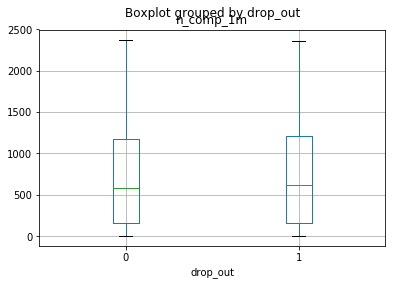

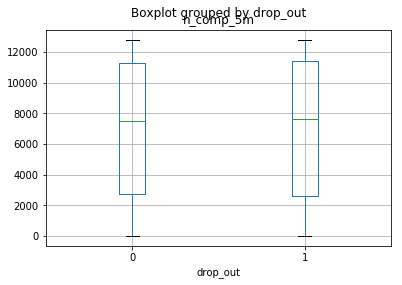

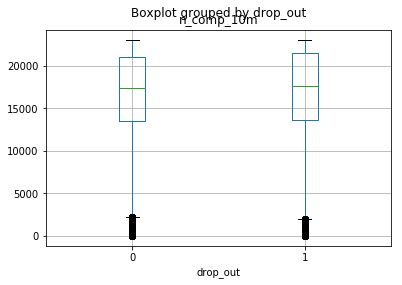

In [79]:
#number of competitors
listings_2017.boxplot(column=['n_comp_1m'], by='drop_out')
listings_2017.boxplot(column=['n_comp_5m'], by='drop_out')
listings_2017.boxplot(column=['n_comp_10m'], by='drop_out')

In [ ]:
#superhost status
listings_2017.groupby('host_is_superhost')['drop_out'].agg({'N': np.size, 'dropout_p': np.mean}).sort_values('dropout_p', ascending = False)